In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rand
import math
from google.colab import files
import io
 

In [3]:
uploaded = files.upload()


Saving netflix_titles.csv to netflix_titles.csv


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['netflix_titles.csv']))
# df = pd.read_csv(uploaded)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
missing_val=[]

for i in df.columns:
  missing=df[i].isnull().sum()
  missing_val.append(missing)
  print("number of missing in column",i,":",missing)
print(missing_val)

number of missing in column show_id : 0
number of missing in column type : 0
number of missing in column title : 0
number of missing in column director : 2634
number of missing in column cast : 825
number of missing in column country : 831
number of missing in column date_added : 10
number of missing in column release_year : 0
number of missing in column rating : 4
number of missing in column duration : 3
number of missing in column listed_in : 0
number of missing in column description : 0
[0, 0, 0, 2634, 825, 831, 10, 0, 4, 3, 0, 0]


In [6]:
number_of_movies=df['type'].value_counts()["Movie"]
number_of_tv_shows=df['type'].value_counts()["TV Show"]
print(number_of_movies,number_of_tv_shows)

6131 2676


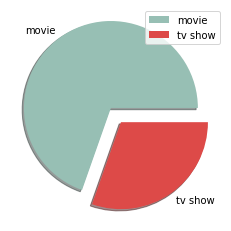

In [7]:
# fig = plt.figure(figsize = (10, 5))
l=[number_of_movies,number_of_tv_shows]
labells=["movie","tv show"]
color=["#97BFB4","#DD4A48"]
explode_val=[0.1,0.1]
plt.pie(l,labels=labells,explode=explode_val,shadow=True,colors=color)
plt.legend()
plt.show()
# plt.bar(courses, values, color ='maroon',
#         width = 0.4)

In [8]:
types_of_movies=[]
for i,j in zip(df["type"],df["listed_in"]):
  if(i=="Movie"):
    types_of_movies.append(j)
# print(len(types_of_movies))
# print("\n\n\n\n\n")
print(types_of_movies)
######################################3
types_of_tv_shows=[]
for i,j in zip(df["type"],df["listed_in"]):
  if(i=="TV Show"):
    types_of_tv_shows.append(j)
# print(len(types_of_tv_shows))
# print("\n\n\n\n\n")
print(types_of_tv_shows)
############################
types_rating_movies=set()
types_rating_tv_shows=set()
for i,j in zip(df["type"],df["rating"]):
  if(i=="Movie"):
    types_rating_movies.add(j)
###############################
for i,j in zip(df["type"],df["rating"]):
  if(i=="TV Show"):
    types_rating_tv_shows.add(j)


['Documentaries', 'Children & Family Movies', 'Dramas, Independent Movies, International Movies', 'Comedies, Dramas', 'Dramas, International Movies', 'Children & Family Movies, Comedies', 'Documentaries, International Movies', 'Thrillers', 'Comedies, International Movies', 'Children & Family Movies', 'Comedies, International Movies, Romantic Movies', 'Comedies, International Movies, Music & Musicals', 'Comedies', 'Horror Movies, Sci-Fi & Fantasy', 'Thrillers', 'Dramas, Independent Movies, International Movies', 'Dramas, International Movies, Thrillers', 'Action & Adventure, Dramas, International Movies', 'Action & Adventure, Dramas', 'Action & Adventure, Classic Movies, Dramas', 'Dramas, Horror Movies, Thrillers', 'Action & Adventure, Horror Movies, Thrillers', 'Action & Adventure, Horror Movies, Thrillers', 'Documentaries', 'Action & Adventure', 'Dramas, Thrillers', 'Action & Adventure, Anime Features, International Movies', 'Action & Adventure, Anime Features, International Movies', 

In [9]:
num_of_movies_for_each_type={}
num_of_tvshows_for_each_type={}
for i in range(len(types_of_movies)):
  num_of_movies_for_each_type[types_of_movies[i]]=len([ g for j,g in zip(df["type"],df["listed_in"]) if j=="Movie" and g==types_of_movies[i]])
print(num_of_movies_for_each_type)
#####################################
for i in range(len(types_of_tv_shows)):
  num_of_tvshows_for_each_type[types_of_tv_shows[i]]=len([ g for j,g in zip(df["type"],df["listed_in"]) if j=="TV Show" and g==types_of_tv_shows[i]])
print(num_of_tvshows_for_each_type)

{'Documentaries': 359, 'Children & Family Movies': 215, 'Dramas, Independent Movies, International Movies': 252, 'Comedies, Dramas': 29, 'Dramas, International Movies': 362, 'Children & Family Movies, Comedies': 201, 'Documentaries, International Movies': 186, 'Thrillers': 65, 'Comedies, International Movies': 176, 'Comedies, International Movies, Romantic Movies': 152, 'Comedies, International Movies, Music & Musicals': 55, 'Comedies': 110, 'Horror Movies, Sci-Fi & Fantasy': 4, 'Dramas, International Movies, Thrillers': 134, 'Action & Adventure, Dramas, International Movies': 132, 'Action & Adventure, Dramas': 34, 'Action & Adventure, Classic Movies, Dramas': 9, 'Dramas, Horror Movies, Thrillers': 1, 'Action & Adventure, Horror Movies, Thrillers': 2, 'Action & Adventure': 128, 'Dramas, Thrillers': 82, 'Action & Adventure, Anime Features, International Movies': 38, 'Documentaries, International Movies, Sports Movies': 44, 'Comedies, Dramas, International Movies': 274, 'Action & Adventu

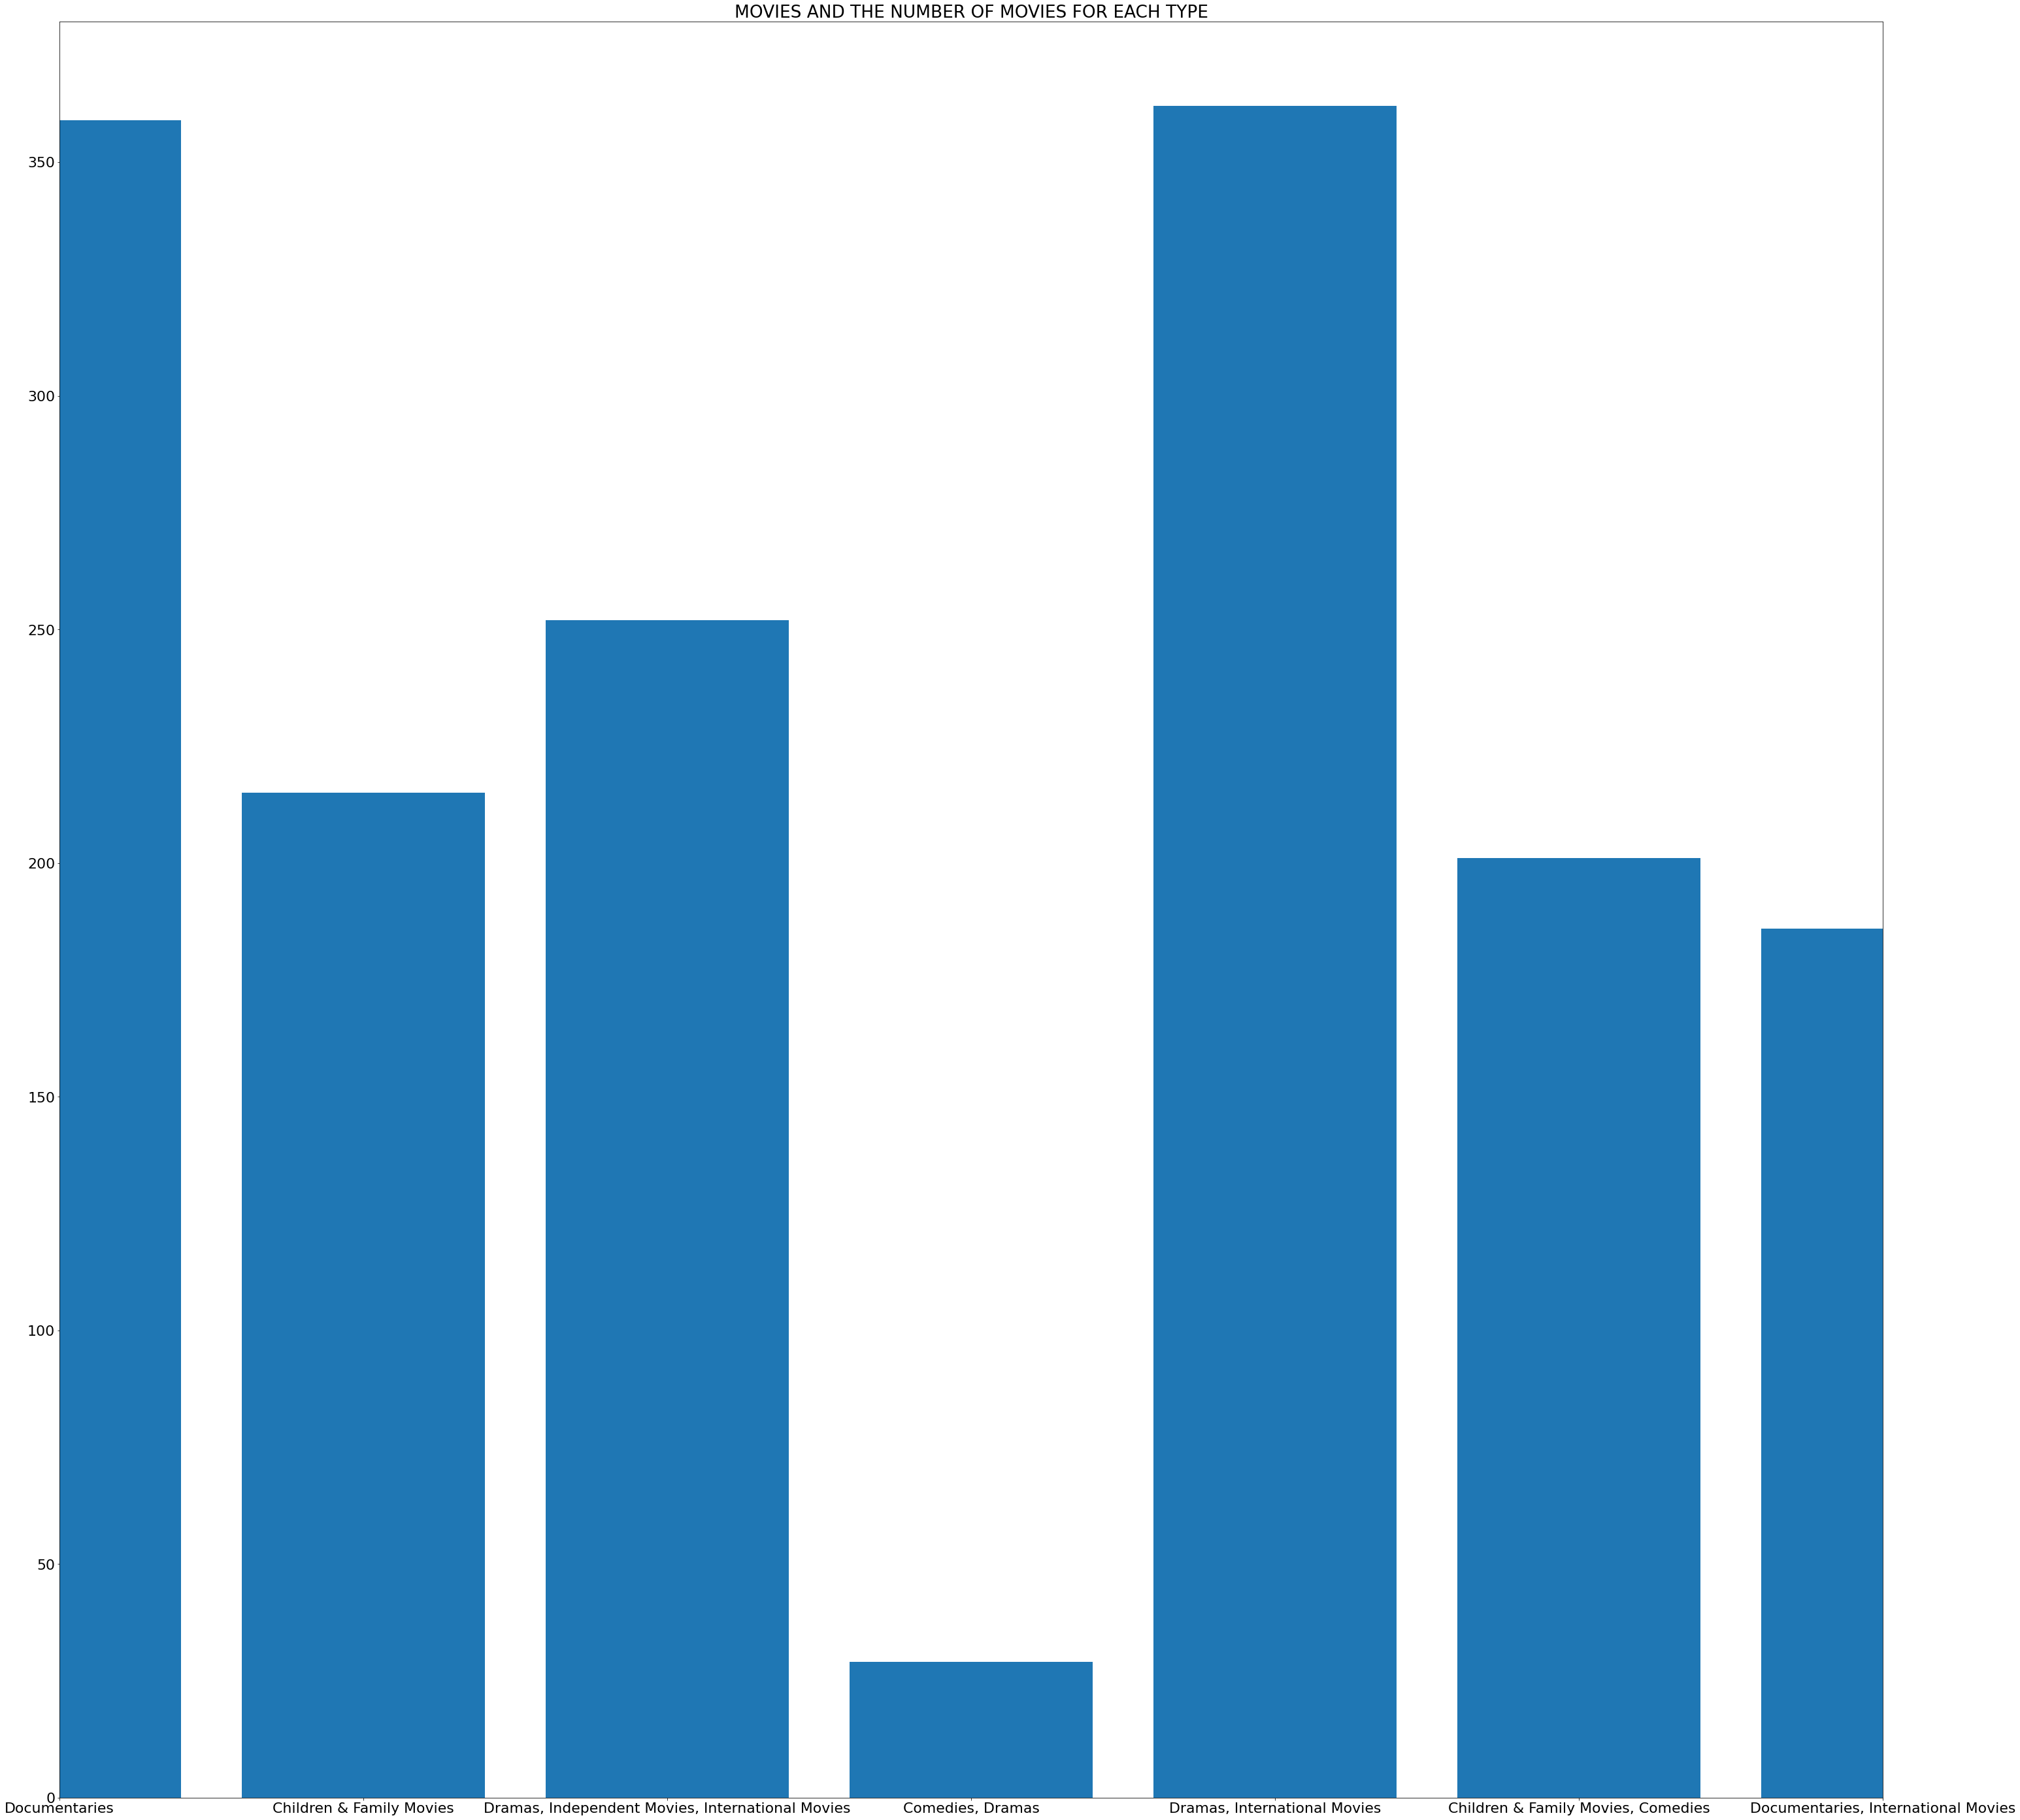

In [69]:
ke=num_of_movies_for_each_type.keys()
val=num_of_movies_for_each_type.values()
# print(len(ke))
plt.figure(figsize=(50,50))
plt.rcParams.update({'font.size': 22}) # must set in top
plt.bar(ke,val)
plt.xlim(0,6)
# plt.legend()
plt.title("MOVIES AND THE NUMBER OF MOVIES FOR EACH TYPE")
plt.show()



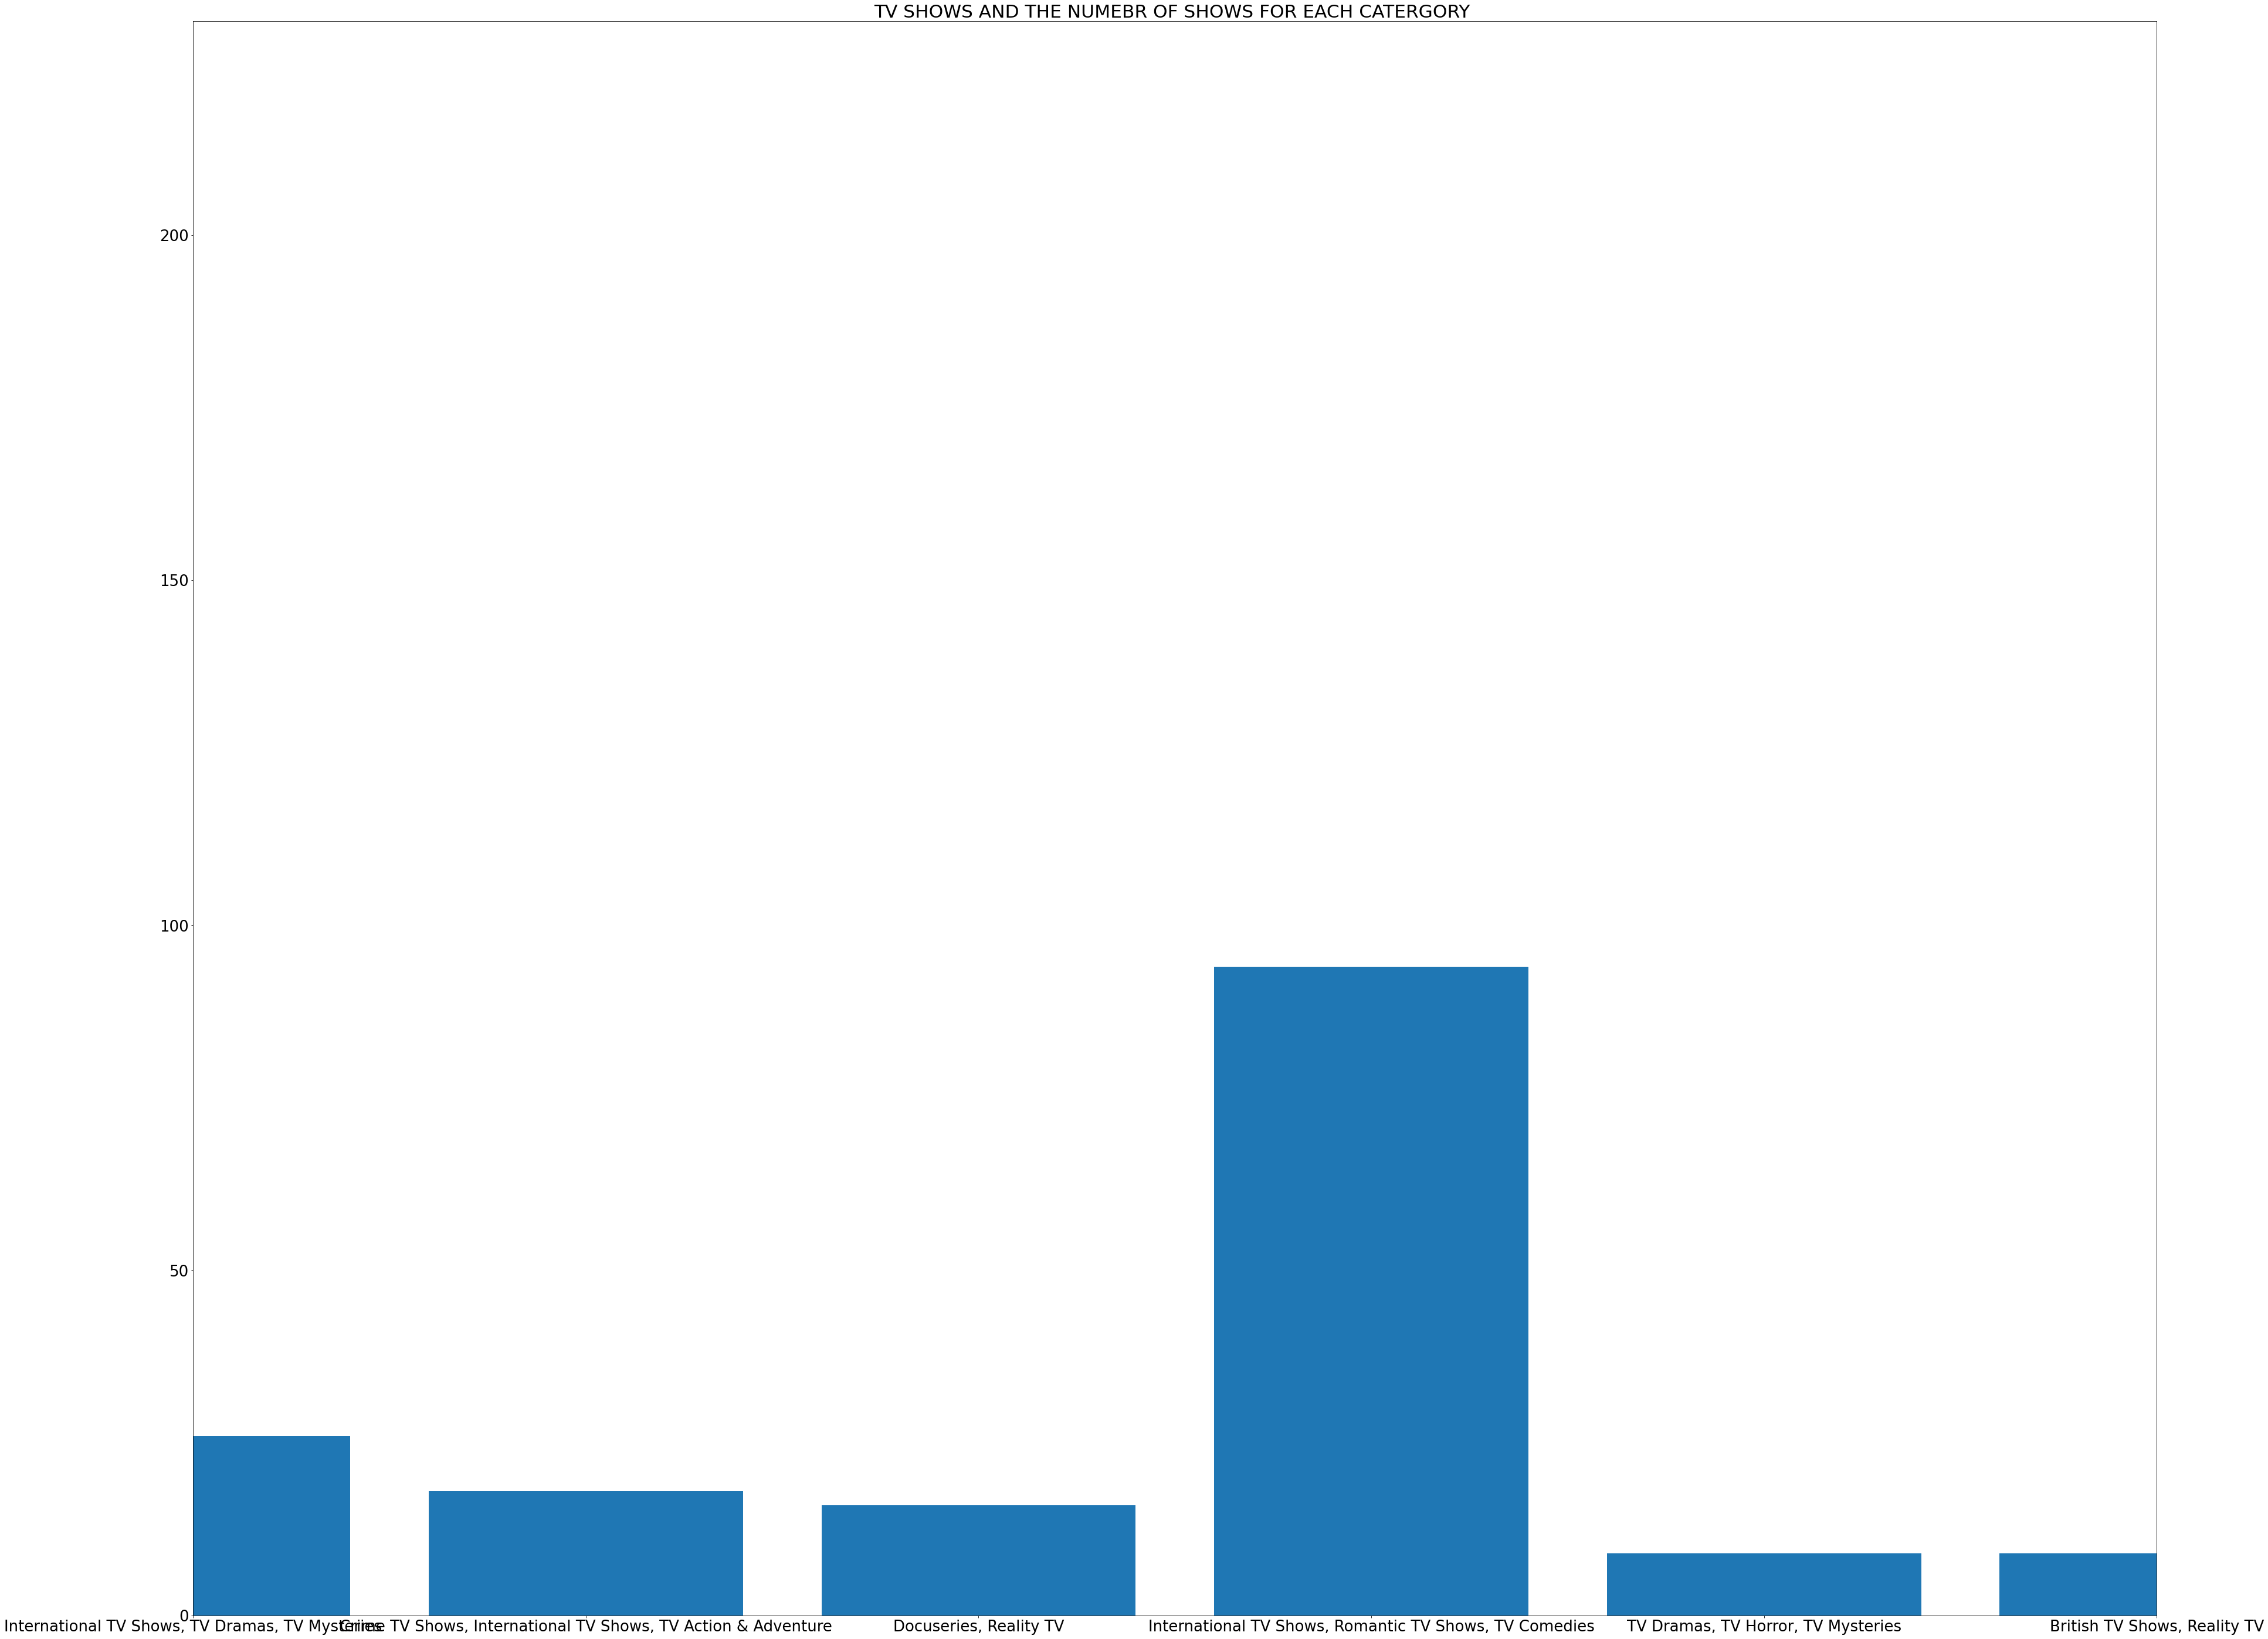

In [72]:
ke2=num_of_tvshows_for_each_type.keys()
val2=num_of_tvshows_for_each_type.values()
# print(len(ke))
plt.figure(figsize=(60,50))
plt.rcParams.update({'font.size': 26}) # must set in top
plt.bar(ke2,val2)
plt.xlim(0,5)
# plt.legend()
plt.title("TV SHOWS AND THE NUMEBR OF SHOWS FOR EACH CATERGORY ")
plt.show()



**READ YA طارطارينو**

In [ ]:
#####try plotting and gathering different tv shows and movies realses dates######
###example count the numebr of movies which were realsed at 2019
###after this plot any number of movies which were reasled on specific range(you can determien this as you like say for example from 2000 to 2020)
